In [ ]:
zip_path = '/content/drive/My\ Drive/Datasets/santa-dataset.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/santa-dataset.zip -d /content

# !rm /content/santa-dataset.zip

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from keras.layers import LeakyReLU

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [ ]:
model = Sequential()
# model.add(Conv2D(32, (3, 3), activation=LeakyReLU(alpha=0.1), kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
# model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
# model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

# opt = SGD(lr=0.001, momentum=0.9)
opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               40960128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [ ]:
dataset_dir = '/content/santa-dataset'

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_aug_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_aug_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

# train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
# test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:
history_base_model = model.fit_generator(train_aug_iterator, steps_per_epoch=len(train_aug_iterator), validation_data=test_aug_iterator, validation_steps=len(test_aug_iterator), epochs=75)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/75
6/6 [==============================] - 24s 4s/step - loss: 29.8953 - accuracy: 0.4713 - val_loss: 3.3636 - val_accuracy: 0.5000
Epoch 2/75
6/6 [==============================] - 20s 3s/step - loss: 2.5241 - accuracy: 0.5483 - val_loss: 1.4004 - val_accuracy: 0.5615
Epoch 3/75
6/6 [==============================] - 20s 3s/step - loss: 1.0880 - accuracy: 0.6390 - val_loss: 0.7473 - val_accuracy: 0.5115
Epoch 4/75
6/6 [==============================] - 20s 3s/step - loss: 0.8849 - accuracy: 0.5076 - val_loss: 0.8211 - val_accuracy: 0.4962
Epoch 5/75
6/6 [==============================] - 21s 4s/step - loss: 0.4491 - accuracy: 0.7523 - val_loss: 0.8849 - val_accuracy: 0.7731
Epoch 6/75
6/6 [==============================] - 20s 3s/step - loss: 0.3847 - accuracy: 0.8671 - val_loss: 0.5226 - val_accuracy: 0.8577
Epoch 7/75
6/6 [==============================] - 19s 3s/step - loss: 0.3142 - accuracy: 0.9003

In [ ]:
history_df = pd.DataFrame(history_base_model.history)
history_df['epoch'] = history_base_model.epoch
history_df

,loss,accuracy,val_loss,val_accuracy,epoch
0,29.895298,0.471299,3.363566,0.500000,0
1,2.524124,0.548338,1.400357,0.561538,1
2,1.088000,0.638973,0.747295,0.511538,2
3,0.884862,0.507553,0.821054,0.496154,3
4,0.449088,0.752266,0.884881,0.773077,4
...,...,...,...,...,...
70,0.040325,0.983384,0.431159,0.930769,70
71,0.028217,0.990937,0.491660,0.923077,71
72,0.019397,0.992447,0.405291,0.930769,72
73,0.029452,0.995468,0.414686,0.926923,73


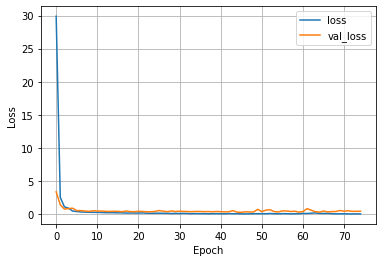

In [ ]:
plot_loss(history_base_model)

Hasil terbaik model ini 

---


Epoch 64/75
 [==============================] - 21s 3s/step - loss: 0.1695 - accuracy: 0.9607 - val_loss: 0.3572 - val_accuracy: 0.9385